# 05 Model Evaluation and Explainability

Evaluate the forecasting model and provide basic explainability using feature importances or SHAP values if available.

In [6]:
# Imports and path setup
import sys
from pathlib import Path
project_root = Path('/home/sayda/update')
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from src.config import PROCESSED_DATA_DIR

In [7]:
# Load features
df = pd.read_csv(PROCESSED_DATA_DIR / "features.csv", parse_dates=["date"])
target = "saudi_production"
feature_cols = [c for c in df.columns if c not in {"date", target} and not c.startswith(target)]

In [8]:
# Prepare data and train model
df["target_h1"] = df[target].shift(-1)
df.dropna(inplace=True)
X = df[feature_cols]
y = df["target_h1"]
model = lgb.LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=6)
model.fit(X, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 47
[LightGBM] [Info] Start training from score 2015.583333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


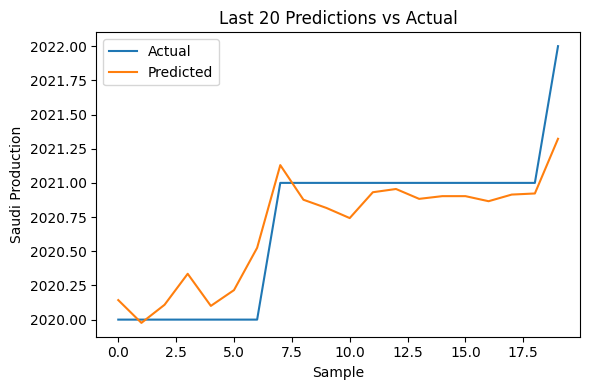

In [9]:
# Predict on the last 20 samples and plot
y_pred = model.predict(X.tail(20))
y_true = y.tail(20).values
plt.figure(figsize=(6,4))
plt.plot(range(len(y_true)), y_true, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.title('Last 20 Predictions vs Actual')
plt.xlabel('Sample')
plt.ylabel('Saudi Production')
plt.legend()
plt.tight_layout()
plt.show()

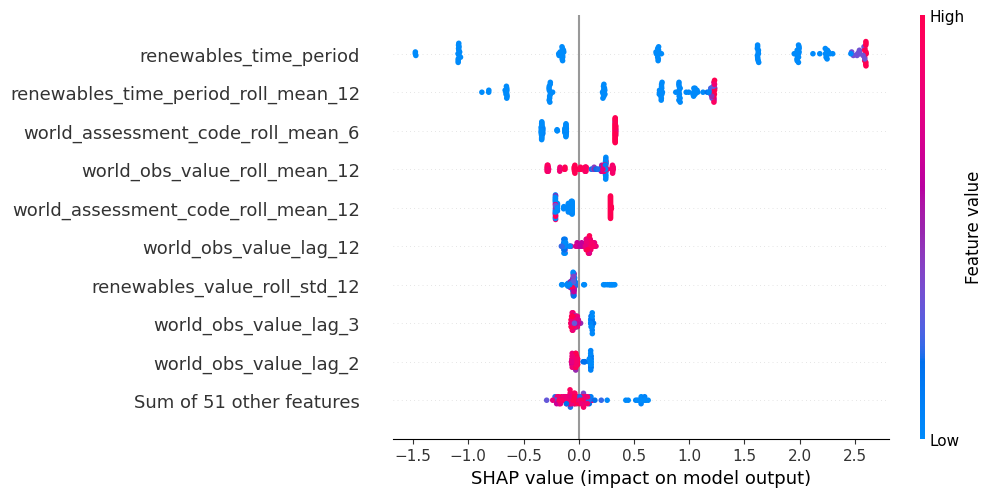

In [10]:
# Explainability: SHAP (if available) or feature importances
try:
    import shap
    explainer = shap.Explainer(model)
    shap_values = explainer(X.tail(100))
    shap.plots.beeswarm(shap_values)
except Exception:
    print("SHAP not available. Showing feature importances instead.")
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:][::-1]
    plt.figure(figsize=(8,4))
    plt.bar(range(len(indices)), importances[indices], tick_label=[feature_cols[i] for i in indices])
    plt.xticks(rotation=90)
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()